### Imports

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Paths

In [2]:
outputPath = "output/"
submissionPath = "submissions/"

### Loading Data

In [3]:
# Load predicted sales
predicted_sales = pd.read_csv(submissionPath + "/submission.csv")
predicted_sales = predicted_sales[predicted_sales.id.str.contains("validation")]
predicted_sales = predicted_sales.iloc[:,1:]
predicted_sales = predicted_sales.T
print(predicted_sales.shape)

(28, 30490)


In [4]:
# Load true sales
with open(outputPath + "/preprocessed_train_valid_data.pkl", "rb") as f:
    df_train_valid = pickle.load(f)
true_sales = df_train_valid[-28:].iloc[:,:30490]
print(true_sales.shape)

(28, 30490)


### Plotting Predictions vs True Sales

In [5]:
def plot_pred(predicted_sales, true_sales, item_index):
    fig, ax = plt.subplots()
    ax.grid()
    
    ax.plot(np.arange(1, len(predicted_sales)+1), predicted_sales, label='predicted sales of item '+str(item_index), color = 'blue')
    ax.plot(np.arange(1, len(true_sales)+1), true_sales, label='true sales of item '+str(item_index), color = 'red')
            
    ax.title.set_text("Predicted vs True sales of item "+str(item_index))
    ax.set_xlabel('Day')
    ax.set_ylabel('Predicted Sales')
    ax.legend(loc='upper right')
    plt.show()

In [14]:
item_index = 5667
predicted_sales_item = predicted_sales[item_index].tolist()
true_sales_item = true_sales[item_index].tolist()

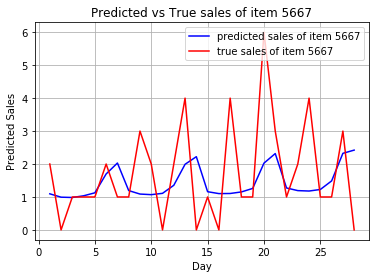

In [15]:
plot_pred(predicted_sales_item, true_sales_item, item_index)